# CSE 482: Big Data Analysis (Spring 2019) Homework 1

Due date: January 28, 2019 (before midnight)

Submit your homework using the D2L system. Use the following Jupyter notebook to write the solution of your homework. Make sure you create an HTML version of the solution and **submit both the notebook and its corresponding HTML file.** For the programming portion of the homework, make sure the notebook also includes the results after executing your code. 

**1.**  For each attribute given below, classify its type as nominal, ordinal, interval, or ratio.

    (a) Number of likes for a Youtube video.
    (b) Area code of a territory (e.g., district, county, or city)
    (c) Sound intensity, measured in decibel scale (https://www.britannica.com/science/sound-physics/The-decibel-scale).
    (d) Day of year, whose value is in the range between 1 and 366.
    (e) Hardness of mineral specimens, measured in Mohs' scale (https://geology.com/minerals/mohs-hardness-scale.shtml)
    (f) Temperature in Fahrenheit scale.
    (g) Heart rate of a patient.
    (h) Social security number of a person.

**Solution:**

    (a) Ratio
    (b) Nominal
    (c) Interval
    (d) Interval
    (e) Ratio
    (f) Ratio
    (g) Ratio
    (h) Nominal
    
---

**2.** State whether it is valid to apply the following operations to the attributes given below (based on the properties of the attribute values). If not valid, state your reason why the operation should not be performed on the attribute.

    (a) Calculating the median household income of the population in a country.
    (b) Calculating the Pearson correlation between SAT score and GPA of students who took a course.
    (c) Calculating the mode of student status (Freshman, Sophomore, Junior, Senior) of undergraduates who had enrolled in CSE 482. 
    (d) Calculating the harmonic mean of user ratings for a movie, where each rating goes from 1 to 5.

**Solution:**

    (a) Valid
    (b) Not valid - GPA is ordinal because it is mapped from a score, Pearsons correlation requires the attributes to be interval. 
    (c) Valid
    (d)  Not valid - someones rating of 3 can be different from someone else. The difference between Joe's 3 and Matt's 2 isn't necessarily the same as the difference between Joe's 3 and Jill's 4. 

**3.**  Write a python program that performs each of the following steps below:

    (a) Use the Twitter streaming API to collect all the tweets that contain the keyword *happy*. Set the timer for collecting the tweets to 5 minutes (300 secs). Save the tweets in a file named data.json.

**Code:**

In [1]:
import time
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import config

C_KEY = config.C_KEY
C_SECRET = config.C_SECRET
A_TOKEN_KEY = config.A_TOKEN_KEY
A_TOKEN_SECRET = config.A_TOKEN_SECRET

# Create a StreamListener class 
class MyListener(StreamListener):

    def __init__(self, time_limit=30):
        self.start_time = time.time()
        self.limit = time_limit
        self.outFile = open('data.json', 'a')
        super(MyListener, self).__init__()
        
    def on_data(self, data):
        if(time.time() - self.start_time) < self.limit:
            self.outFile.write(data.strip())
            self.outFile.write('\n')
            return True
        else:
            self.outFile.close()
            return False
        
    def on_error(self, status):
        print(status)
        
auth = OAuthHandler(C_KEY,C_SECRET)
auth.set_access_token(A_TOKEN_KEY,A_TOKEN_SECRET)
myStream = Stream(auth, MyListener(time_limit=300 ))
myStream.filter(track=['happy'])

    (b) Load the json file and display the text messages of the first 10 tweets.

In [7]:
import json

with open('data.json') as f:
    tweets = [json.loads(line) for line in f]
    for i in range(10):
        print(tweets[i]['text'], '\n')

@damnzdandan happy birthday!!💗 

RT @40oz_VAN: It’s your turn to be happy. 

RT @jphilby1899: Happy Happy Hump Day!😘 https://t.co/W6DEFVhs0D 

RT @TownnnBiz: Made a thing 
Happy birthday to @Qwerty_Soda 
🎂🍰🎉 https://t.co/kQ0u7tir0x 

RT @LTolstoyQuotes: In order to be happy, one simply needs to know that the happiness we wish for has been given to us. 

RT @kinarishokudo: おはようさんです！家の除雪か～ら～の店前…中々、手強そうだ(&gt;_&lt;)ゞ
営業に間に合うか？
では、どちら様もHAPPYな１日を～🎶 https://t.co/zW4kqWJ7bt 

RT @TimothyTheHippo: Dear Fiona @CincinnatiZoo, 

Happy Birthday to you,
Happy BIrthday to you,
You look like a gorgeous hippo,
You smell l… 

The Beths - Happy Unhappy https://t.co/k6a2Vjy7AH #NowPlaying #6music 

We don’t laugh because we’re happy – we’re happy because we laugh. William James
 @ClaireZapanta4 @PbbSethLie_8… https://t.co/bsAzqUBdOm 

RT @Peacharu_: My favorite thing about bunz is that they express joy by leaping around. That’s a happy bun. https://t.co/97zcg2CEVA 



    (c) Extract the names of all the users who posted the tweets given in the JSON data along with their respective follower counts. Store the usernames and follower counts as dictionary objects (to obtain unique usernames). Plot a bar chart that shows the names of the top-10 users with the most number of followers.
    
**Code:**

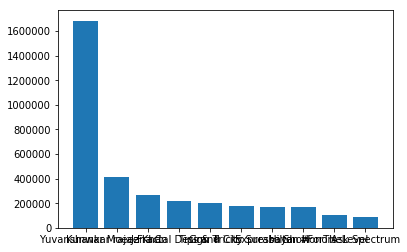

In [21]:
import matplotlib.pyplot as plt
import operator

u = {}

with open('data.json') as f:
    tweets = [json.loads(line) for line in f]
    for twt in tweets:
        u[twt['user']['name']] = int(twt['user']['followers_count'])

top10 = dict(sorted(u.items(), key=operator.itemgetter(1), reverse=True)[:10])

plt.bar(range(len(top10)), top10.values(), align='center')
plt.xticks(range(len(top10)), list(top10.keys()))

plt.show()

**4.** Consider the following schema for an online streaming service, where users are allowed to play (stream) songs performed by different artists. Primary and foreign key constraints are also listed for the schema of each table.

    User (ID, Password, Name, Location)   Primary key = ID
    
    Artist (ID, Name, Birthyear)   Primary key = ID

    Song (ID, Title, Album, ArtistID)   
    
        Primary key = ID
        
        Song(ArtistID) references Artist(ID)

    Play (ID, UserID, SongID, Timestamp)   
    
        Primary key = ID

        Play(UserID) references User(ID)

        Play(SongID) references Song(ID)

Express each of the following query in SQL.

**(a)** Find the unique IDs of users who have played songs performed by the artist named *Michael Jackson*.

**Solution:**

SELECT DISTINCT Play.UserID

FROM Play, Song, Artist

WHERE (Play.SongID = Song.ID AND Song.ArtistID = Artist.ID AND Artist.Name = "Michael Jackson")



**(b)** Find the unique IDs of users who have played more than one song performed by the artist named *Michael Jackson*. In other words, your query result must include only those users who have played at least 2 different songs performed by Michael Jackson. 

**Solution:**

**(c)**  Find the title of the most popular song, i.e., the song that received the highest play count (i.e., number of times it was played), and its corresponding play count. Note that a user can play the same song more than once (so the play count should sum up the total number of times each user has played a given song).

**Solution:**

**(d)** Find the titles of songs that have never been streamed (played) by any user.

**Solution:**

**5.** Download the Pittsburgh city fire incident data from the class web page. Using Jupyter notebook, write a Python program that performs the following steps.

**(a)** Use pandas to load the CSV file into a DataFrame object named data. After loading the data successfully:

i. Type data.head() to return the first 5 records of the dataset.

**Solution:**

In [23]:
import pandas as pd

data = pd.read_csv("fire.csv")

data.head()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,16-Mar,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,21-Mar,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,10-Jan,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,16-Jan,40.449009,-80.076607


ii. Determine the number of rows (data records) and columns (attributes) of the dataset using the data.shape command.
   
**Solution:**   

In [27]:
print("rows    = ", data.shape[0])
print("columns = ", data.shape[1])

rows    =  5956
columns =  18


iii. Count the frequency of each type of fire incident by applying the value_counts() function to the type description column (see the pandas example given in lecture 2).

**Solution:**

In [62]:
data.type_description.value_counts()

Cooking fire, confined to container                   1388
Building fire                                         1240
Passenger vehicle fire                                 710
Outside rubbish, trash or waste fire                   481
Outside rubbish fire, Other                            329
Brush or brush-and-grass mixture fire                  301
Dumpster or other outside trash receptacle fire        275
Trash or rubbish fire, contained                       275
Special outside fire, Other                            155
Natural vegetation fire, Other                         147
Mobile property (vehicle) fire, Other                  135
Fires in structure other than in a building             91
Grass fire                                              80
Fire, Other                                             80
Outside equipment fire                                  44
Fuel burner/boiler malfunction, fire confined           43
Road freight or transport vehicle fire                  

(b) Using pymongo, write the Python code for storing the data into MongoDB. Specifically, create a collection named fire, where each document corresponds to a fire incident record. You must first convert each record into a dictionary object before inserting it into MongoDB (see the example given in Exercise 3). Each fire incident record should be stored as a set of key-value pairs in BSON format on MongoDB, where the keys should correspond to the attribute names of the original CSV data file.

**Solution:**

In [60]:
d = data.to_dict(orient='index')
for k,v in d.items():
    print(v)
    break

{'call_no': 'F160029985', 'incident_type': 111.0, 'type_description': 'Building fire', 'address': '800 BLOCK CENTER ST, WILKINSBURG PA 15221', 'alarm_time': '2016-04-21T05:01:04', 'alarms': 1, 'primary_unit': '231EN16', 'census_tract': nan, 'neighborhood': nan, 'council_district': nan, 'ward': nan, 'tract': 42003560600.0, 'public_works_division': nan, 'pli_division': nan, 'police_zone': nan, 'fire_zone': '16-Mar', 'latitude': 40.44127547, 'longitude': -79.88248508}


In [61]:
import pymongo

try:     
    connection = pymongo.MongoClient('localhost', 27017)
    db = connection['test']
    
    if db.fire.count_documents({}) > 0:                   # Just to allow rerun without duplicates
        db.fire.drop()
    
    d = data.to_dict(orient='index')
    
    for k,v in d.items():
        db.fire.insert_one(v)
            
    numRecords = db.fire.count_documents({})             # count number of records 
    print("Number of records = ", numRecords)
    connection.close()

except pymongo.errors.ConnectionFailure as e:
    print("Could not connect to MongoDB: %s" % e)

Number of records =  5956


(c) Using pymongo, execute a MongoDB query that identifies the top-5 most frequent type of fire incidents. Your result should be consistent with the answer for Question 5(a)(iii). Hint: you will need to use the following MongoDB operators for the query: group, sort, and $limit. See the example given in https://www.mkyong.com/mongodb/mongodb-aggregate-and-group-example/ on how to write queries with aggregate functions. Note that aggregate functions are implemented in pymongo as follows:

    db.<collection_name>.aggregate( ... )

**Solution:**

In [65]:
import pymongo

try:     
    connection = pymongo.MongoClient('localhost', 27017)
    db = connection['test']
    
    cursor = db.fire.aggregate([
                {"$group": {"_id": "$type_description", "Frequency": {"$sum": 1}}},
                {"$sort" : {"Frequency" : -1}},
                {"$limit" : 5}
             ])
    for record in cursor:
        print(record)
    
    connection.close()

except pymongo.errors.ConnectionFailure as e:
    print("Could not connect to MongoDB: %s" % e)

{'_id': 'Cooking fire, confined to container', 'Frequency': 1388}
{'_id': 'Building fire', 'Frequency': 1240}
{'_id': 'Passenger vehicle fire', 'Frequency': 710}
{'_id': 'Outside rubbish, trash or waste fire', 'Frequency': 481}
{'_id': 'Outside rubbish fire, Other', 'Frequency': 329}
